In [ ]:
!pip install torch torchvision torchaudio diffusers transformers accelerate
!pip install opencv-python numpy matplotlib
!pip install trimesh pyrender scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Mounted at /content/drive
✅ Using dataset folder: /content/drive/MyDrive/dataSet
✅ Found 726 images in dataset!


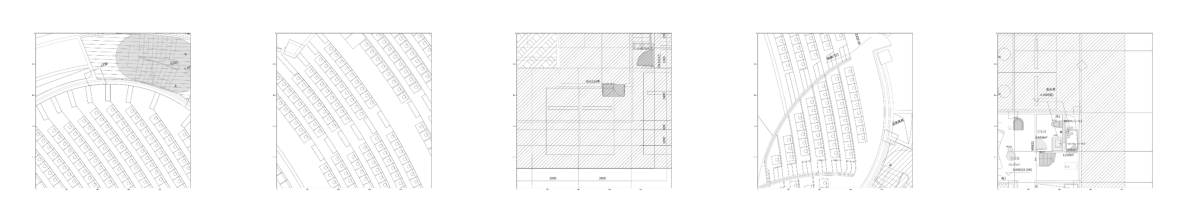

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Generated blueprint saved!


In [ ]:
import os
import zipfile
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
from transformers import ViTModel, ViTFeatureExtractor
from skimage.metrics import structural_similarity as ssim
from google.colab import drive

drive.mount('/content/drive')

dataset_folder_path = "/content/drive/MyDrive/dataSet"
zip_path = "/content/drive/MyDrive/dataset.zip"
extract_path = dataset_folder_path

if os.path.exists(zip_path):
    extract_path = "/content/dataset"
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully!")
else:
    print(f"✅ Using dataset folder: {extract_path}")

def load_and_preprocess_images(data_path, img_size=(512, 512)):
    images = []
    if not os.path.exists(data_path):
        raise ValueError(f"❌ Dataset folder {data_path} does not exist!")

    image_files = [os.path.join(dp, f) for dp, dn, fn in os.walk(data_path) for f in fn if f.endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) == 0:
        raise ValueError("❌ Dataset folder is empty! Upload images.")

    print(f"✅ Found {len(image_files)} images in dataset!")

    for img_path in image_files:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append(img)

    return np.array(images)

dataset = load_and_preprocess_images(extract_path)

def show_sample_images(images, num=5):
    num = min(num, len(images))
    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    for i in range(num):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

show_sample_images(dataset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k").to(device)

def extract_features(image):
    image = Image.fromarray((image * 255).astype(np.uint8))
    inputs = feature_extractor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = vit_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2").to(device)

def generate_architectural_diagram(prompt):
    image = pipeline(prompt=prompt).images[0]
    image.show()
    return image

prompt = "A detailed modern house floor plan with multiple rooms and accurate proportions."
generated_image = generate_architectural_diagram(prompt)

generated_image.save("generated_blueprint.png")
print("✅ Generated blueprint saved!")


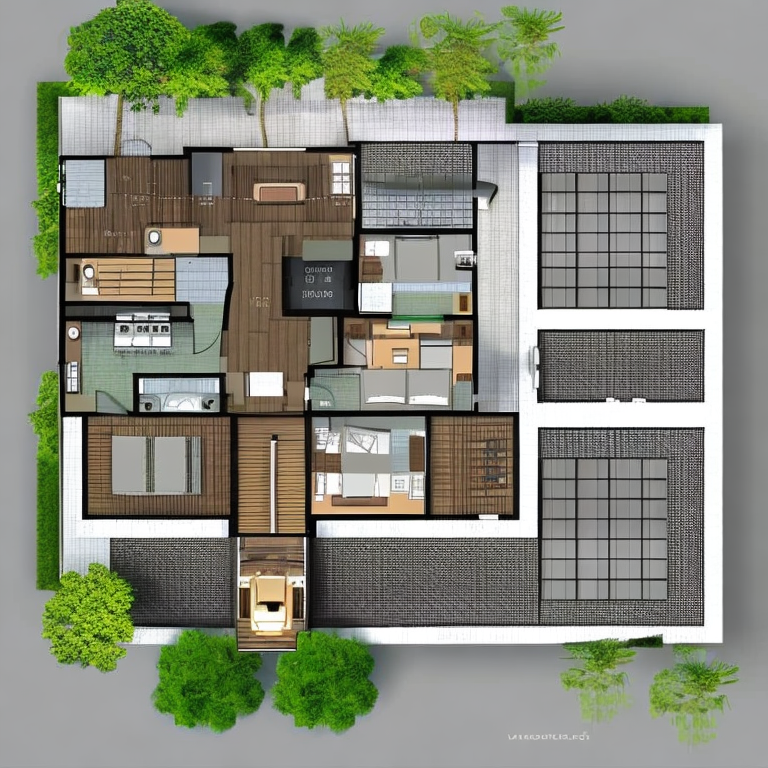

Generated blueprint displayed!


In [ ]:
from IPython.display import display

generated_image.save("generated_blueprint.png")
display(generated_image)
print("Generated blueprint displayed!")
